### 작성일 : 19/08/07
### 목적 : D1 의미 파악?

In [331]:
from plotnine import *
import os, gc, datetime, time
import pandas as pd, numpy as np
from tqdm import tqdm_notebook
import warnings
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8] # setting figure size
warnings.filterwarnings(action='ignore')
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

In [321]:
train_trans = pd.read_csv("/Users/jeong/downloads/IEEE/input/train_transaction.csv")
train_idf = pd.read_csv("/Users/jeong/downloads/IEEE/input/train_identity.csv")

test_trans = pd.read_csv("/Users/jeong/downloads/IEEE/input/test_transaction.csv")
test_idf = pd.read_csv("/Users/jeong/downloads/IEEE/input/test_identity.csv")

In [332]:
train_trans['day'] = round(train_trans['TransactionDT'] / 60 / 60 / 24, 0)
test_trans['day'] = round(test_trans['TransactionDT'] / 60 / 60 / 24, 0)

In [333]:
train_trans['day'] = round(train_trans['TransactionDT'] / 60 / 60 / 24, 0)
test_trans['day'] = round(test_trans['TransactionDT'] / 60 / 60 / 24, 0)

tr2 = train_trans.sample(frac = 0.05, replace = True, random_state = 59)
te2 = test_trans.sample(frac = 0.05, replace = True, random_state = 59)

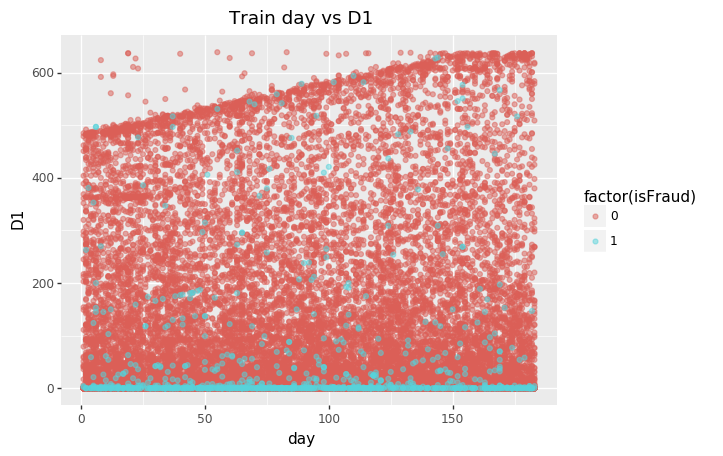

<ggplot: (7578451471)>

In [334]:
ggplot(tr2, aes(x = 'day', y = 'D1', color = 'factor(isFraud)') ) + geom_point(alpha = 0.5) + ggtitle("Train day vs D1")

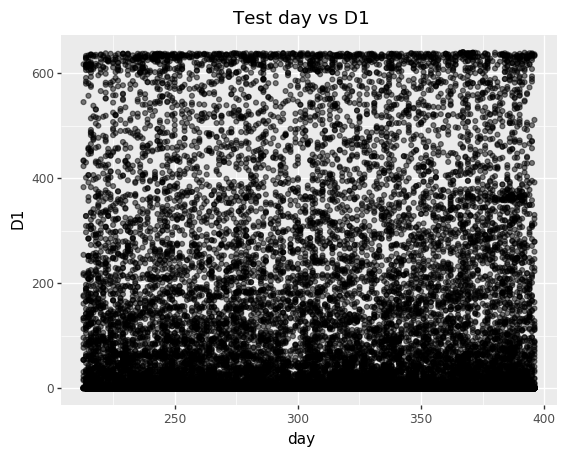

<ggplot: (7569324029)>

In [335]:
ggplot(te2, aes(x = 'day', y = 'D1') ) + geom_point(alpha = 0.5) + ggtitle("Test day vs D1")

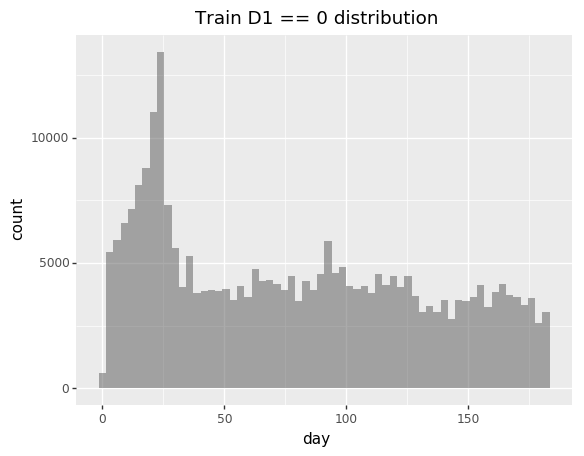

<ggplot: (-9223372029290329235)>

In [336]:
ggplot(train_trans[train_trans['D1']==0], aes(x = 'day') ) + geom_histogram(alpha = 0.5) + ggtitle("Train D1 == 0 distribution")

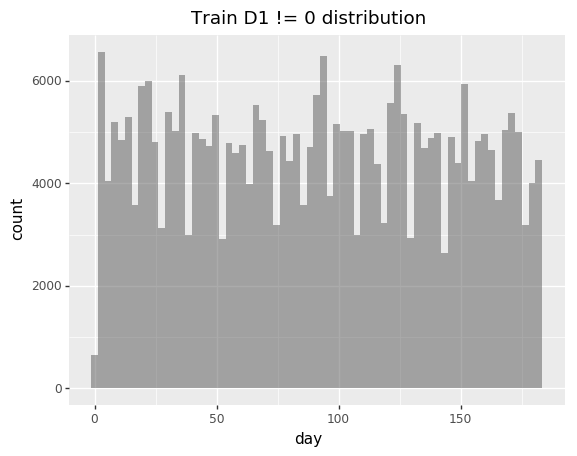

<ggplot: (-9223372029276431770)>

In [337]:
ggplot(train_trans[train_trans['D1']!=0], aes(x = 'day') ) + geom_histogram(alpha = 0.5) + ggtitle("Train D1 != 0 distribution")

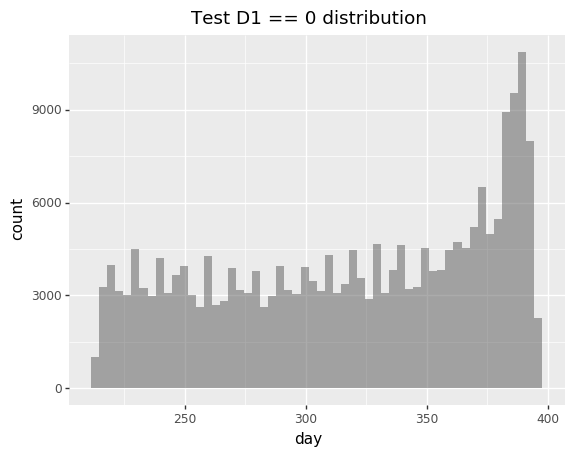

<ggplot: (-9223372029284756764)>

In [338]:
ggplot(test_trans[test_trans['D1']==0], aes(x = 'day') ) + geom_histogram(alpha = 0.5) + ggtitle("Test D1 == 0 distribution")

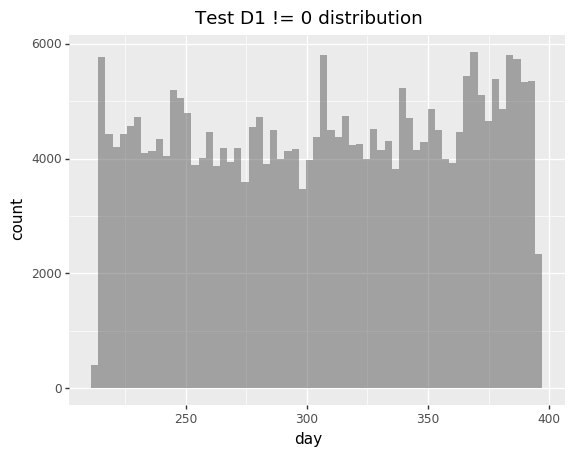

<ggplot: (7564111652)>

In [339]:
ggplot(test_trans[test_trans['D1']!=0], aes(x = 'day') ) + geom_histogram(alpha = 0.5) + ggtitle("Test D1 != 0 distribution")

### D1 : card 발급일, D2 : card 전산 등록일?

In [326]:
ex = train_trans[train_trans['D1'].notnull() & train_trans['D2'].notnull()]
ex['D_12'] = ex['D1'] - ex['D2']
ex['D_12'].describe()

count    309743.000000
mean          5.597531
std          34.542629
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         629.000000
Name: D_12, dtype: float64

In [329]:
ex = train_trans[train_trans['D1']==0]
print("D1이 0일때 D2의 NA 비율:",ex['D2'].isnull().sum() / ex.shape[0] )

D1이 0일때 D2의 NA 비율: 0.9486738300074965


In [324]:
ex1 = train_trans[train_trans['card6']=='credit']
ex2 = train_trans[train_trans['card6']=='debit']

print("credit 카드 D2 NA 비율 :",ex1['D2'].isnull().sum() / ex1.shape[0] )
print("debit 카드 D2 NA 비율 :",ex2['D2'].isnull().sum() / ex2.shape[0] )

credit 카드 D2 NA 비율 : 0.6577262293101365
debit 카드 D2 NA 비율 : 0.41389013906505007
